In [1]:
# Se importan las librerías necesarias para realizar la limpieza y entrenamientos de modelo seleccionado. 
# En este caso HistGradientBoostingRegressor 

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

In [2]:
train_dataset = pd.read_csv('../input/train.csv', index_col=0)

In [3]:
#predict_dataset = pd.read_csv('./predict.csv', index_col=0)

In [4]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [5]:
train_dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [6]:
#train_dataset.cut.value_counts()

In [7]:
#train_dataset.color.value_counts()

In [8]:
#train_dataset.clarity.value_counts()

In [9]:
#train_dataset.isna().sum()

In [10]:
le = preprocessing.LabelEncoder()
def num_transform(datasets,columns):
    for ds in datasets:
        for column in columns:
            ds[f"{column}_num"] = le.fit_transform(ds[column])
datasets = [train_dataset]
columns = ["cut","color","clarity"]
num_transform(datasets,columns)

In [11]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_num,color_num,clarity_num
id,,,,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,3,4,2
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,4,1,3
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,4,0,3
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,2,1,4
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,4,2,3


In [12]:
columnas = [a for a in train_dataset.columns if a not in ["cut","color","clarity","price"]]
X = train_dataset[columnas]
y = train_dataset["price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


In [23]:
model_select = HistGradientBoostingRegressor(loss='poisson', max_iter=200, max_leaf_nodes=33, max_depth=5)
model = model_select.fit(X_train, y_train)
scores = cross_val_score(model,X,y, cv=20)

In [24]:
y_pred = model.predict(X_test)

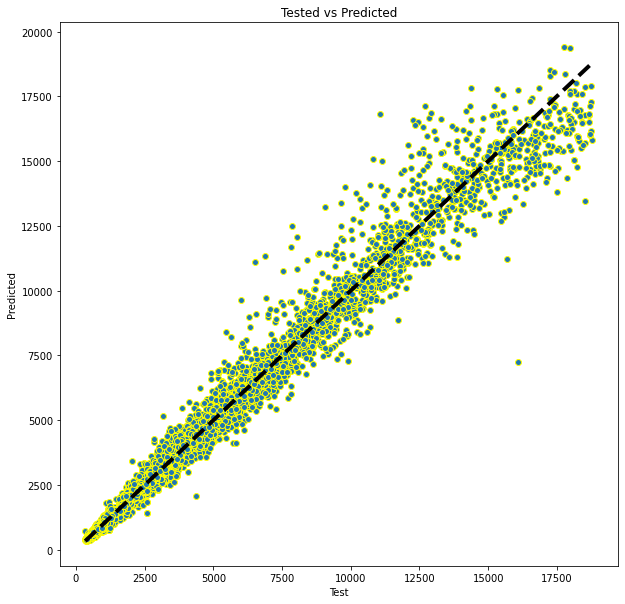

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred, edgecolors='yellow')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')
ax.set_title("Tested vs Predicted")
plt.show()

In [26]:
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2', r2_score(y_test,y_pred))

RMSE 564.301124579292
R2 0.980013675813478
